

# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In my Data Analysis I will explore the 'No-show appointments' data set. The data in the file contains records for people no shown for their appoitment.Patient information such as preexisting medical conditions and economic and social backgrounds has been given in the data set. 
> The goal for this analysis is to find:
>1. People from which age group tends not to show up for their medical appointment and if there is any difference between male and female?
2. Do people who participate in the Bolsa Família programe are more willing to show up for the appointment?
3. Are people with preexisting medical conditions are more willing to missed their appointment?


In [1]:
#  import packeges

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.tseries.offsets import Day



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# read the csv file
df_no_show = pd.read_csv(r'~/anaconda3/udacity_solution/project 2/KaggleV2-May-2016.csv', sep=',')

# show the first rows from the data set
df_no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#show the shape of the data set - number of rows and columns
df_no_show.shape

(110527, 14)

In [4]:
df_no_show.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object



### Data Cleaning (Replace this with more specific notes!)

#### 1. Replace the column names to lower case and more readable names

In [5]:
# rename the existing DataFrame columns
df_no_show.rename(columns={'PatientId': 'patient_id', 'AppointmentID': 'appointment_id', 
                        'ScheduledDay': 'scheduled_day','AppointmentDay': 'appointment_day',
                       'No-show': 'No_show', 'Hipertension':'hypertension',
                          'Handcap': 'handicap'},inplace=True)

In [6]:
# lowercase labels for the dataset columns
df_no_show.rename(columns=lambda x: x.lower(), inplace=True)

# confirm changes
df_no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### 2. Change the data type of the columns

In [7]:
#change the datatpe of patient_id to int
df_no_show['patient_id'] = df_no_show['patient_id'].apply(np.int64)

In [8]:
#change the scheduled_day and appointment_day to date
df_no_show['scheduled_day'] = pd.to_datetime(df_no_show['scheduled_day'], format= "%Y-%m-%d %H:%M:%S")
df_no_show['appointment_day'] = pd.to_datetime(df_no_show['appointment_day'], format= "%Y-%m-%d %H:%M:%S")

In [9]:
#change to bool dtype
df_no_show['no_show'] = df_no_show['no_show'].map({"No": 0, "Yes": 1}).astype(bool)
for col in ['scholarship',"hypertension","diabetes","alcoholism","handicap","sms_received"]:
    df_no_show[col] = df_no_show[col].astype(bool) 
df_no_show.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,False
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,False
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,False
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,False


In [10]:
df_no_show.dtypes

patient_id                       int64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                       bool
hypertension                      bool
diabetes                          bool
alcoholism                        bool
handicap                          bool
sms_received                      bool
no_show                           bool
dtype: object

In [11]:
# view missing value count
df_no_show.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

In [12]:
#check if any of the columns has null value
df_no_show.isnull().sum().any()

False

In [13]:
#check for duplicate values
df_no_show.duplicated().sum()

0

####  3. Add age group column

In [14]:
df_no_show['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [15]:
df_no_show['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [16]:
# 46 records have age greater than 95
df_no_show.loc[df_no_show.age>95].shape

(46, 14)

In [17]:
# 3540 records have age less than or equal to 0 which is irelevant 
df_no_show.loc[df_no_show.age<= 0].shape

(3540, 14)

In [18]:
pd.value_counts(df_no_show['age'])

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [19]:
df_no_show['age'].clip(0,95,inplace=True)

In [20]:
pd.value_counts(df_no_show['age'])

0     3540
1     2273
52    1746
49    1652
53    1651
      ... 
92      86
95      70
91      66
93      53
94      33
Name: age, Length: 96, dtype: int64

In [21]:
# create bin edges that will be used to "cut" the data into groups
bin_edges =[0,13, 18, 25, 35, 60, 96]

In [22]:
#print the number of values in different groups
pd.value_counts(df_no_show['age'])

0     3540
1     2273
52    1746
49    1652
53    1651
      ... 
92      86
95      70
91      66
93      53
94      33
Name: age, Length: 96, dtype: int64

In [23]:
# Labels for the four acidity level groups
bin_names = [ '<=12','from 13 to 17' ,'from 18 to 24','from 25 to 34', 'from 35 to 59', '>=60']

In [24]:
# Creates age_group column
df_no_show['age_group'] = pd.cut(df_no_show['age'], bin_edges,labels=bin_names,right=False)

#print the number of values in different groups
pd.value_counts(df_no_show['age_group'])


from 35 to 59    37728
>=60             21173
<=12             21037
from 25 to 34    14358
from 18 to 24     9888
from 13 to 17     6343
Name: age_group, dtype: int64

In [25]:
# Checks for successful creation of this column
df_no_show.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,False,>=60
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,False,from 35 to 59
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,False,>=60
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False,<=12
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,False,from 35 to 59


In [26]:
#drop the missing values in age_group column
df_no_show['age_group'].dropna()
df_no_show.isnull().sum()


patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
age_group          0
dtype: int64

#### 4. Scheduled day and Appointment day 
Check whether the Appointment day is after the Scheduled day
From the cells we can see that the Scheduled day has hours but for the Appointment day there are no hours

In [27]:
df_no_show['scheduled_day'].head()

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
Name: scheduled_day, dtype: datetime64[ns, UTC]

In [28]:
df_no_show['appointment_day'].head()

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
2   2016-04-29 00:00:00+00:00
3   2016-04-29 00:00:00+00:00
4   2016-04-29 00:00:00+00:00
Name: appointment_day, dtype: datetime64[ns, UTC]

In [29]:
# 38568 appointments were scheduled after the appointment datetime
(df_no_show['scheduled_day'] > df_no_show['appointment_day']).sum()

38568

In [30]:
# shifting the appointment day with 1 day forward using the pandas Date ofset - Day
df_no_show['appointment_day'] = df_no_show['appointment_day'] + 1*Day()

In [31]:
#after the changes there are still 5 rows where scheduled day is after the appointment day
(df_no_show['scheduled_day'] > df_no_show['appointment_day']).sum()

5

In [32]:
# Drop the last 5 records where the scheduled day is after the appointment
df_no_show= df_no_show.loc[(df_no_show['scheduled_day'] <= df_no_show['appointment_day'])].copy()

In [33]:
#now there is no sheduled day after the appointment
(df_no_show['scheduled_day'] > df_no_show['appointment_day']).sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


## Research Question 1 ( Which is the possibility for age groups not to show up for their medical appointment?)

### 1. Grouping

In [34]:
# See how much people not showing for their appointment -> 
#-> significantly large number of people are showing for their appointment
df_no_show.groupby(['no_show']).size()

no_show
False    88208
True     22314
dtype: int64

In [35]:
# records grouped by gender and no_show
#-> records for Females are significantly more than for males
df_no_show.groupby(['gender']).size()

gender
F    71837
M    38685
dtype: int64

In [36]:
#records grouped by age group
# -> records for age group from 35 to 59 are the most
df_no_show.groupby(['age_group']).size()

age_group
<=12             21036
from 13 to 17     6343
from 18 to 24     9886
from 25 to 34    14358
from 35 to 59    37727
>=60             21172
dtype: int64

In [37]:
#records grouped by age group and gender
#-> using this grouping I found that the most records in the data sets are for Females from 35 to 59
df_no_show.groupby(['age_group','gender']).size()

age_group      gender
<=12           F         10023
               M         11013
from 13 to 17  F          3876
               M          2467
from 18 to 24  F          7263
               M          2623
from 25 to 34  F         10499
               M          3859
from 35 to 59  F         25890
               M         11837
>=60           F         14286
               M          6886
dtype: int64

In [38]:
#show the mean value of people no showing for the appointment grouped by age group and gender
df_no_show.groupby(['age_group','gender']).mean().no_show

age_group      gender
<=12           F         0.204530
               M         0.204849
from 13 to 17  F         0.261094
               M         0.274828
from 18 to 24  F         0.249621
               M         0.249333
from 25 to 34  F         0.234022
               M         0.230111
from 35 to 59  F         0.193897
               M         0.189660
>=60           F         0.156727
               M         0.145513
Name: no_show, dtype: float64

#### -  After showing different grouping I found that the records for women from age 35 to 59 significantly exceeds the records for other groups so I have decided to use the mean value of no_show variable  in order to compare the people from different groups

###   2. Bar chart (Number of no shows across age groups) 
### *-> Getting older people are more willing to show for the appointment*

Text(0, 0.5, 'Rate of no shows')

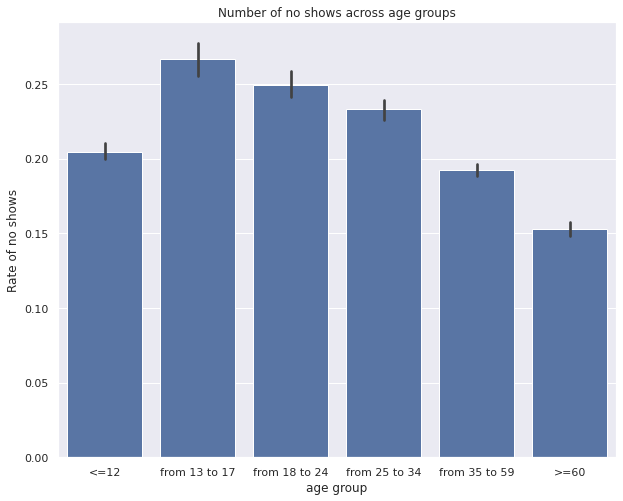

In [39]:
# plot number of no shows across age groups using seaborn library
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x="age_group", y="no_show", data=df_no_show,
             color="b").set_title('Number of no shows across age groups')
plt.xlabel("age group")
plt.ylabel("Rate of no shows")

#### - The bar chart above shows that people tends to show more for their appointment when geting older and that the age group that missed the appointment the most are from age group 13 to 17. For this observation the mean value of no shows has been used.

### 3. Line chart (Number of no shows across age groups and gender)
### *-> Teenagers has the highest rate of no showing for the appointment and there are not significat difference between genders*

In [40]:
#Create a custom function to plot no show rate by age groups across other variables
def custom_plot(x,y, ax=None, **plt_kwargs):
    #if ax is None:
    #    ax = plt.gca()
   # ax.plot(x, y, **plt_kwargs) ## example plot here
    ax.pivot_table(values=x, index="age_group", columns=y, aggfunc=np.mean).plot(**plt_kwargs)
    return(ax)

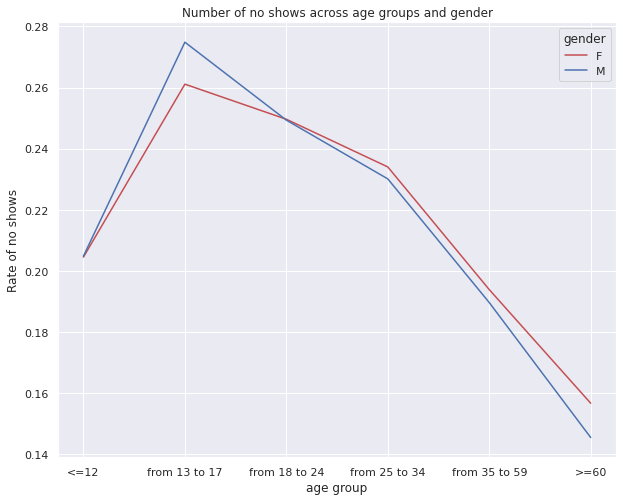

In [41]:
#expressing no show rate by age groups across gender
ax_gender = custom_plot('no_show','gender', ax=df_no_show,kind='line',color=['r', 'b'],xlabel='age group',
                     ylabel="Rate of no shows",title="Number of no shows across age groups and gender",
                       figsize=(10,8))



#### - We can see that gender does not influence the rate of no shows by much. However the rate of no shows does depend on age- the peak is  for ages between 13 an 17 and drops as the age increases.

## Research Question 2  (Do people who participate in the Bolsa Família programe are more willing to show up for the appointment?)

### 1. Bar Chart ( Number of no shows across scholarships)
### *-> People who participate in sholarship program are more willing not to show for their appointment*

In [42]:
#grouped by sholarship and find the mean value of no_show variable 
df_no_show.groupby(["scholarship"])["no_show"].mean()

scholarship
False    0.198031
True     0.237363
Name: no_show, dtype: float64

Text(0, 0.5, 'Rate of no shows')

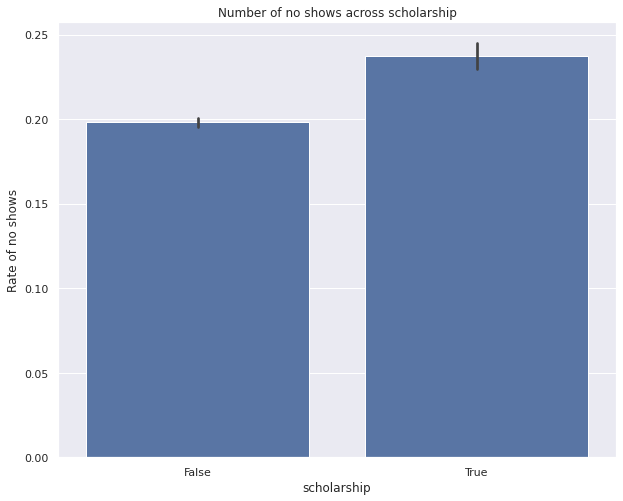

In [43]:
#vizualizing the findigs using a bar chart and a seaborn library
sns.set_color_codes("pastel")
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x="scholarship", y="no_show", data=df_no_show,
            color="b").set_title('Number of no shows across scholarship')
plt.xlabel("scholarship")
plt.ylabel("Rate of no shows")

 #### *- the mean value for people who missed their appointments and participate in sholarship programme is larger than for these who didn't participate in the programme*

### 2. Bar Chart ( Number of no shows across age groups and scholarships)

In [44]:
#show the mean value of people no showing for the appointment grouped by age group and scholarship
df_no_show.groupby(['age_group','scholarship']).mean().no_show

age_group      scholarship
<=12           False          0.202691
               True           0.222915
from 13 to 17  False          0.263276
               True           0.283811
from 18 to 24  False          0.246428
               True           0.275281
from 25 to 34  False          0.229441
               True           0.253854
from 35 to 59  False          0.188451
               True           0.226680
>=60           False          0.152915
               True           0.158784
Name: no_show, dtype: float64

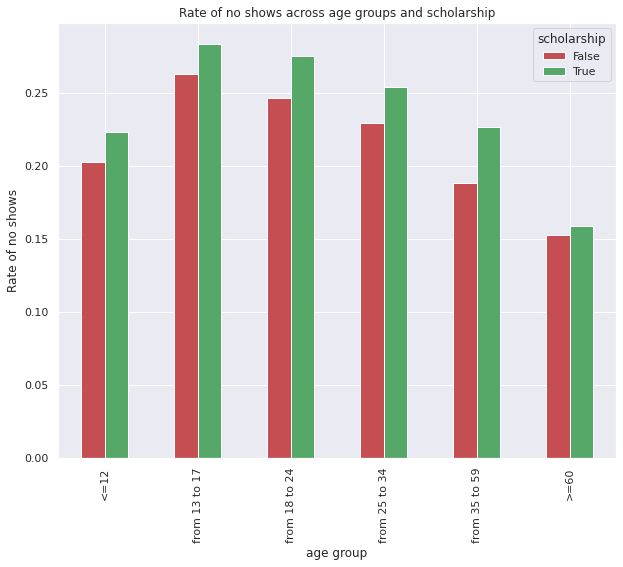

In [45]:
#expressing no show rate by age groups across scholarship
ax_scholarship = custom_plot('no_show','scholarship', ax=df_no_show,kind='bar',color=['r', 'g'],
                             xlabel='age group',
                     ylabel="Rate of no shows",title="Rate of no shows across age groups and scholarship")

#### -The chart shows that for people with scholarship the rate of missed appointments is slightly higher than for those without so scholarship represents an important variable. Here we can also see that rate also drops with age increase  for both groups of people(with and without scholarship).

### Research Question 3 (Are people with preexisting medical conditions are more willing to missed their appointment?)

### 1. Grouping by preexisting conditions

In [46]:
#People with diabetes have lower rate of no shown 
df_no_show.groupby(["diabetes"])["no_show"].mean()

diabetes
False    0.203589
True     0.180033
Name: no_show, dtype: float64

In [47]:
#People with hypertension have lower rate of no shown 
df_no_show.groupby(["hypertension"])["no_show"].mean()

hypertension
False    0.208992
True     0.173020
Name: no_show, dtype: float64

In [48]:
#People with alcoholism have almost equal rate of no shown as these who are not alcoholics
df_no_show.groupby(["alcoholism"])["no_show"].mean()

alcoholism
False    0.201909
True     0.201488
Name: no_show, dtype: float64

In [49]:
#People not suffering from any disease tend to miss their appointments more
df_no_show.groupby(["diabetes","alcoholism","alcoholism"])["no_show"].mean()

diabetes  alcoholism  alcoholism
False     False       False         0.203574
          True        True          0.204095
True      False       False         0.180134
          True        True          0.177711
Name: no_show, dtype: float64

### 2.  How no showing rate are related to different preexisting condition grouped by age
People from age group (18 to 24) suffering diabetes and hypertension have the higher rate of no shows for the appointment

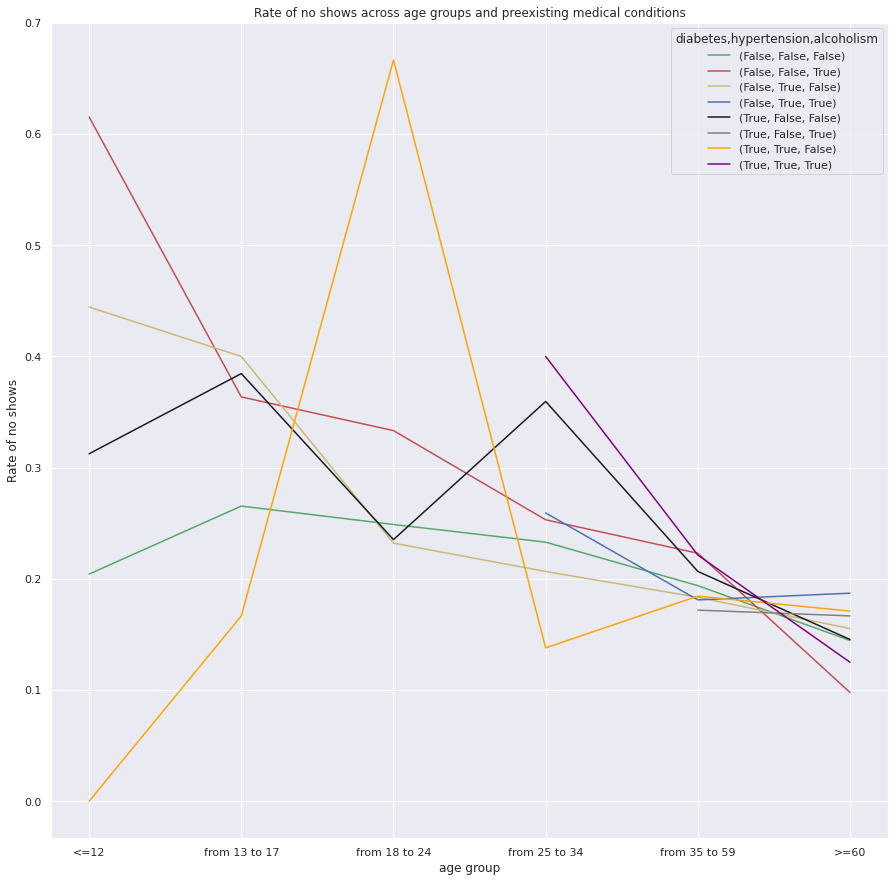

In [50]:
#expressing no show rate by age groups across different preexisting diseases- diabetes, hypertension,alcoholism
ax_disease = custom_plot('no_show',["diabetes","hypertension","alcoholism"], ax=df_no_show,kind='line',
                         color=['g', 'r','y','b','k','gray','orange','purple'],xlabel='age group',
                     ylabel="Rate of no shows",
                         title="Rate of no shows across age groups and preexisting medical conditions",
                         figsize=(15,15))

#### *- This chart shows different line chart for any combination of preexisting conditions-diabetes,hypertension and alcoholism. The orange line that represents people with diabetes and hypertention  shows that people from 18 to 24  with these diseases are missing their apointments the most. After the peak it drops to significantly lower rate.

### Limitations
Despite the fact that there were no null values in the data set there were a bunch of iconsistent data. In the age column some of the rows were equal to -1 which is irrelevant - you can not be on negative age so I was forced to drop all the rows where the age was -1. Also there was a misconsistence between the appointment and scheduled day so I had to shift the appointment day with one day foreward. After a plenty of data cleaning I came up with a more appropriate data set in which I could made some conclusions about my findings.


<a id='conclusions'></a>
## Conclusions

After the analysis that I have done I came up with several findings:
1. With age people tend to attend more their appointments and people from age group 13-17 are missing their appointments the most.
2. Gender doesn't affect people's decision about showing for the appointment or not.
3. People who participate in the schoolarship programme are more willing to miss their appointments.
4. People who suffer from any disease are more willing to show for their apointment.
5. When I explored the no show rate by age I found that people from age group(18 to 24) who have diabetes and hypertension have the highest rate of no shows.
